In [31]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## User Inputs

In [32]:
infile = 'vtov_dataset.npz'
model_path = 'vtov_model_1node_fn1_1'

## Loading Data and Model

In [33]:
npfile = np.load(infile)
inputs = npfile['inputs']
target = npfile['outputs']

In [34]:
model = torch.load(model_path)

In [35]:
# standardize inputs
inputMeans = inputs[0:int(inputs.shape[0]),:].mean(axis=0)
inputStdDevs = inputs[0:int(inputs.shape[0]),:].std(axis=0)
inputs = (inputs-inputMeans)/inputStdDevs
inputs = torch.from_numpy(inputs).float()

# get model outputs
output = model(inputs)
output = output.data.numpy()

# unstandardize outputs
outputMeans = target[0:int(target.shape[0]),:].mean(axis=0) 
outputStdDevs = target[0:int(target.shape[0]),:].std(axis=0)

output = output*outputStdDevs+outputMeans

# convert inputs back to numpy arrays
inputs = inputs.data.numpy()

# calculate differences for every element
diff = target-output

# set maxes, mins
minDiff = np.amin(diff,axis=0)
maxDiff = np.amax(diff,axis=0)
stdDiff = np.std(diff,axis=0)
meanDiff = np.mean(diff,axis=0)
minTarget = np.amin(target,axis=0)
maxTarget = np.amax(target,axis=0)
minOutput = np.amin(output,axis=0)
maxOutput = np.amax(output,axis=0)
minInput = np.amin(inputs,axis=0)
maxInput = np.amax(inputs,axis=0)

## Generating Plots

C:\Users\khaya\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


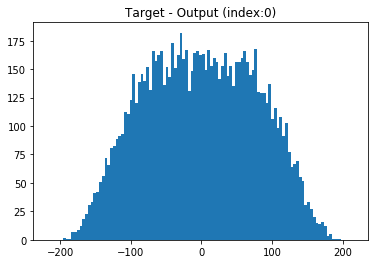

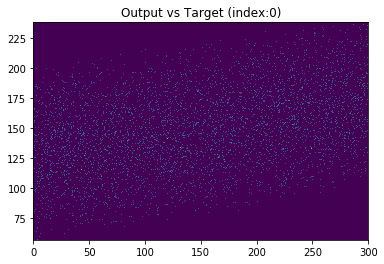

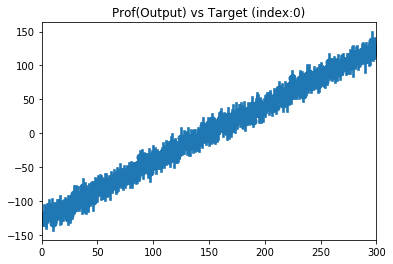

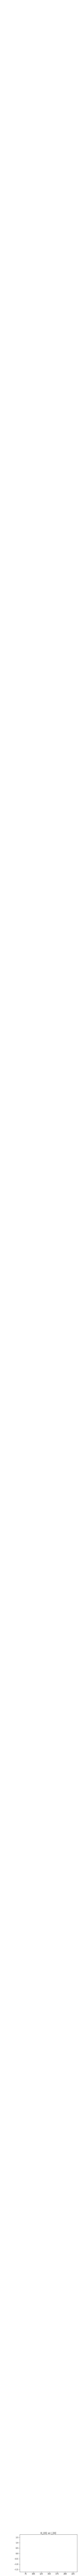

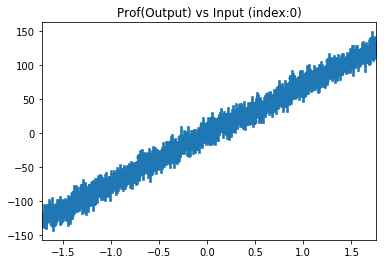

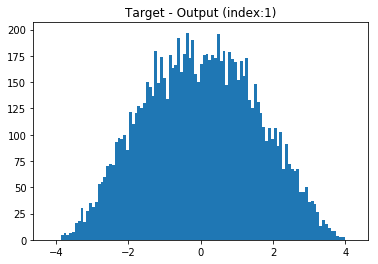

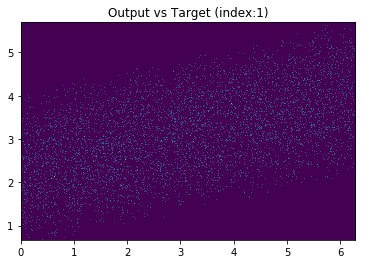

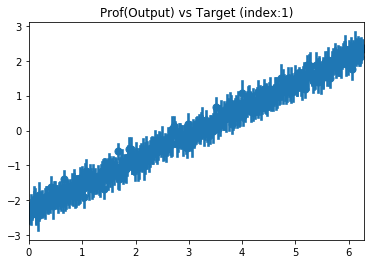

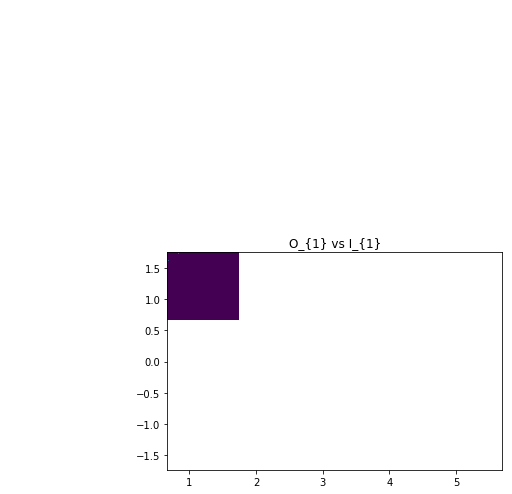

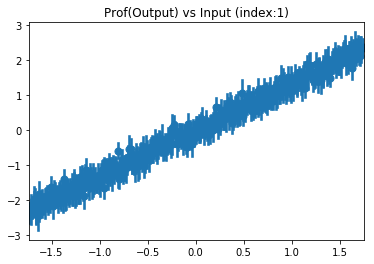

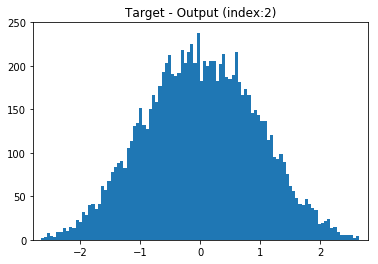

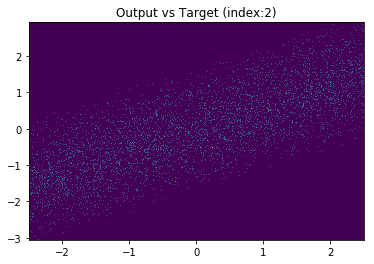

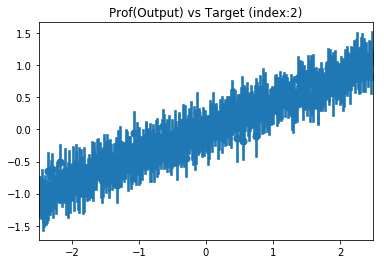

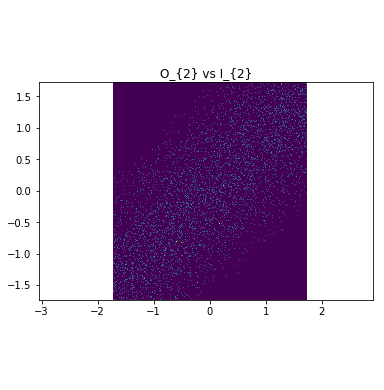

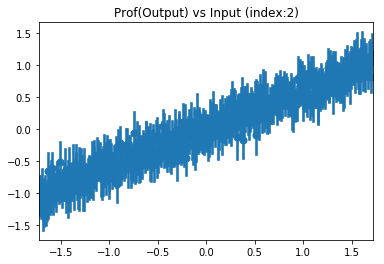

In [36]:
# create a histogram for each output in the target

for itarg in range(target.shape[1]):

    diffarray = diff[:,itarg]
    targetarray = target[:,itarg]
    outputarray = output[:,itarg]
    inputsarray = inputs[:,itarg]
    
    fig1 = plt.figure()
    plt.hist(diffarray, bins=100)
    plt.title('Target - Output (index:{})'.format(itarg))
    plt.xlim(meanDiff[itarg]-3*stdDiff[itarg],meanDiff[itarg]+3*stdDiff[itarg])
    plt.figure(figsize=(20,15))
    fig1.savefig('./histograms/v-to-v_act_1node_fn1/test1/hist_1_{}.png'.format(itarg), format='png')
    
    fig2 = plt.figure()
    plt.hist2d(targetarray,outputarray, bins=400)
    plt.title('Output vs Target (index:{})'.format(itarg))
    plt.xlim(minTarget[itarg],maxTarget[itarg])
    plt.ylim(minOutput[itarg],maxOutput[itarg])
    plt.figure(figsize=(20,15))
    fig2.savefig('./histograms/v-to-v_act_1node_fn1/test1/hist_2_{}.png'.format(itarg), format='png')
            
    fig3 = plt.figure()
    sns.regplot(x=targetarray, y=diffarray, x_bins=400, fit_reg=None)
    plt.title('Prof(Output) vs Target (index:{})'.format(itarg))
    plt.xlim(minTarget[itarg],maxTarget[itarg])
    plt.figure(figsize=(20,15))
    fig3.savefig('./histograms/v-to-v_act_1node_fn1/test1/hist_3_{}.png'.format(itarg), format='png')
            
    fig4 = plt.figure()
    plt.hist2d(inputsarray,outputarray, bins=400)
    plt.title('O_{{{0}}} vs I_{{{0}}}'.format(itarg))
    plt.xlim(minOutput[itarg],maxOutput[itarg])
    plt.ylim(minInput[itarg],maxInput[itarg])
    plt.figure(figsize=(20,15))
    fig4.savefig('./histograms/v-to-v_act_1node_fn1/test1/hist_4_{}.png'.format(itarg), format='png')
            
    fig5 = plt.figure()
    sns.regplot(x=inputsarray, y=diffarray, x_bins=400, fit_reg=None)
    plt.title('Prof(Output) vs Input (index:{})'.format(itarg))
    plt.xlim(minInput[itarg],maxInput[itarg])
    plt.figure(figsize=(20,15))
    fig5.savefig('./histograms/v-to-v_act_1node_fn1/test1/hist_5_{}.png'.format(itarg), format='png')             
            